# 🔄 Advanced Transformation Techniques

This notebook demonstrates advanced musical transformation techniques using the Cancrizans library.

**Topics covered:**
- Retrograde (time reversal)
- Inversion (pitch mirroring)
- Augmentation & Diminution (tempo changes)
- Complex transformation chains
- Creating custom canons
- Analyzing results

In [1]:
# Imports
import sys
sys.path.insert(0, '..')

from cancrizans import (
    retrograde, invert, augmentation, diminution,
    assemble_crab_from_theme, interval_analysis, is_time_palindrome
)
from music21 import note, stream, pitch
import matplotlib.pyplot as plt
import numpy as np

print("✓ Imports successful!")

✓ Imports successful!


## 1. Creating a Simple Melody

Let's start with a simple ascending scale.

In [2]:
# Create C major scale
melody = stream.Part()
pitches = ['C4', 'D4', 'E4', 'F4', 'G4', 'A4', 'B4', 'C5']

for p in pitches:
    melody.append(note.Note(p, quarterLength=1.0))

print(f"Melody: {len(pitches)} notes")
print(f"Duration: {melody.duration.quarterLength} quarter notes")
print(f"Pitches: {[n.pitch.nameWithOctave for n in melody.notes]}")

Melody: 8 notes
Duration: 8.0 quarter notes
Pitches: ['C4', 'D4', 'E4', 'F4', 'G4', 'A4', 'B4', 'C5']


## 2. Retrograde Transformation

Retrograde reverses the order of notes in time.

In [3]:
# Apply retrograde
melody_retro = retrograde(melody)

original_pitches = [n.pitch.nameWithOctave for n in melody.notes]
retro_pitches = [n.pitch.nameWithOctave for n in melody_retro.notes]

print("Original:", ' '.join(original_pitches))
print("Retrograde:", ' '.join(retro_pitches))
print(f"\nReversed? {original_pitches == retro_pitches[::-1]}")

Original: C4 D4 E4 F4 G4 A4 B4 C5
Retrograde: C5 B4 A4 G4 F4 E4 D4 C4

Reversed? True


## 3. Inversion Transformation

Inversion flips pitches around an axis pitch.

In [4]:
# Invert around E4 (MIDI 64)
melody_inv = invert(melody, axis_pitch='E4')

original_midi = [n.pitch.midi for n in melody.notes]
inverted_midi = [n.pitch.midi for n in melody_inv.notes]

print("Axis: E4 (MIDI 64)")
print(f"Original MIDI: {original_midi}")
print(f"Inverted MIDI: {inverted_midi}")

# Verify inversion: 2*axis - original = inverted
expected = [2*64 - m for m in original_midi]
print(f"\nCorrect inversion? {inverted_midi == expected}")

Axis: E4 (MIDI 64)
Original MIDI: [60, 62, 64, 65, 67, 69, 71, 72]
Inverted MIDI: [68, 66, 64, 63, 61, 59, 57, 56]

Correct inversion? True


## 4. Augmentation & Diminution

These transformations change the tempo by scaling note durations.

In [5]:
# Augmentation (slower - 2x duration)
melody_aug = augmentation(melody, factor=2)

# Diminution (faster - 1/2 duration)
melody_dim = diminution(melody, factor=2)

print(f"Original duration: {melody.duration.quarterLength}q")
print(f"Augmented (2x): {melody_aug.duration.quarterLength}q")
print(f"Diminished (1/2): {melody_dim.duration.quarterLength}q")

# Compare note durations
orig_dur = melody.notes[0].quarterLength
aug_dur = melody_aug.notes[0].quarterLength
dim_dur = melody_dim.notes[0].quarterLength

print(f"\nNote duration - Original: {orig_dur}q")
print(f"Note duration - Augmented: {aug_dur}q")
print(f"Note duration - Diminished: {dim_dur}q")

Original duration: 8.0q
Augmented (2x): 16.0q
Diminished (1/2): 4.0q

Note duration - Original: 1.0q
Note duration - Augmented: 2.0q
Note duration - Diminished: 0.5q


## 5. Transformation Chains

We can combine multiple transformations!

In [6]:
# Chain: Augment → Invert → Retrograde
result = melody
result = augmentation(result, factor=1.5)  # 50% slower
result = invert(result, axis_pitch='G4')            # Invert around G4
result = retrograde(result)                 # Reverse

print("Transformation chain applied:")
print(f"1. Augmentation (1.5x)")
print(f"2. Inversion (axis: G4/MIDI 67)")
print(f"3. Retrograde")
print(f"\nOriginal: {melody.duration.quarterLength}q, pitches: {[n.nameWithOctave for n in melody.pitches]}")
print(f"Result:   {result.duration.quarterLength}q, pitches: {[n.nameWithOctave for n in result.pitches]}")

Transformation chain applied:
1. Augmentation (1.5x)
2. Inversion (axis: G4/MIDI 67)
3. Retrograde

Original: 8.0q, pitches: ['C4', 'D4', 'E4', 'F4', 'G4', 'A4', 'B4', 'C5']
Result:   12.0q, pitches: ['D4', 'E-4', 'F4', 'G4', 'A4', 'B-4', 'C5', 'D5']


## 6. Creating a Mirror Canon

A mirror canon combines the original with its retrograde.

In [7]:
# Create mirror canon
canon = assemble_crab_from_theme(melody)

print(f"Mirror canon created!")
print(f"Parts: {len(canon.parts)}")
print(f"Duration: {canon.duration.quarterLength}q")

# Check if it's a palindrome
is_palindrome = is_time_palindrome(canon)
print(f"\nIs time palindrome? {is_palindrome}")

Mirror canon created!
Parts: 2
Duration: 8.0q

Is time palindrome? True


## 7. Visualizing Transformations

Let's visualize pitch patterns.

✓ Saved: transformation_comparison.png


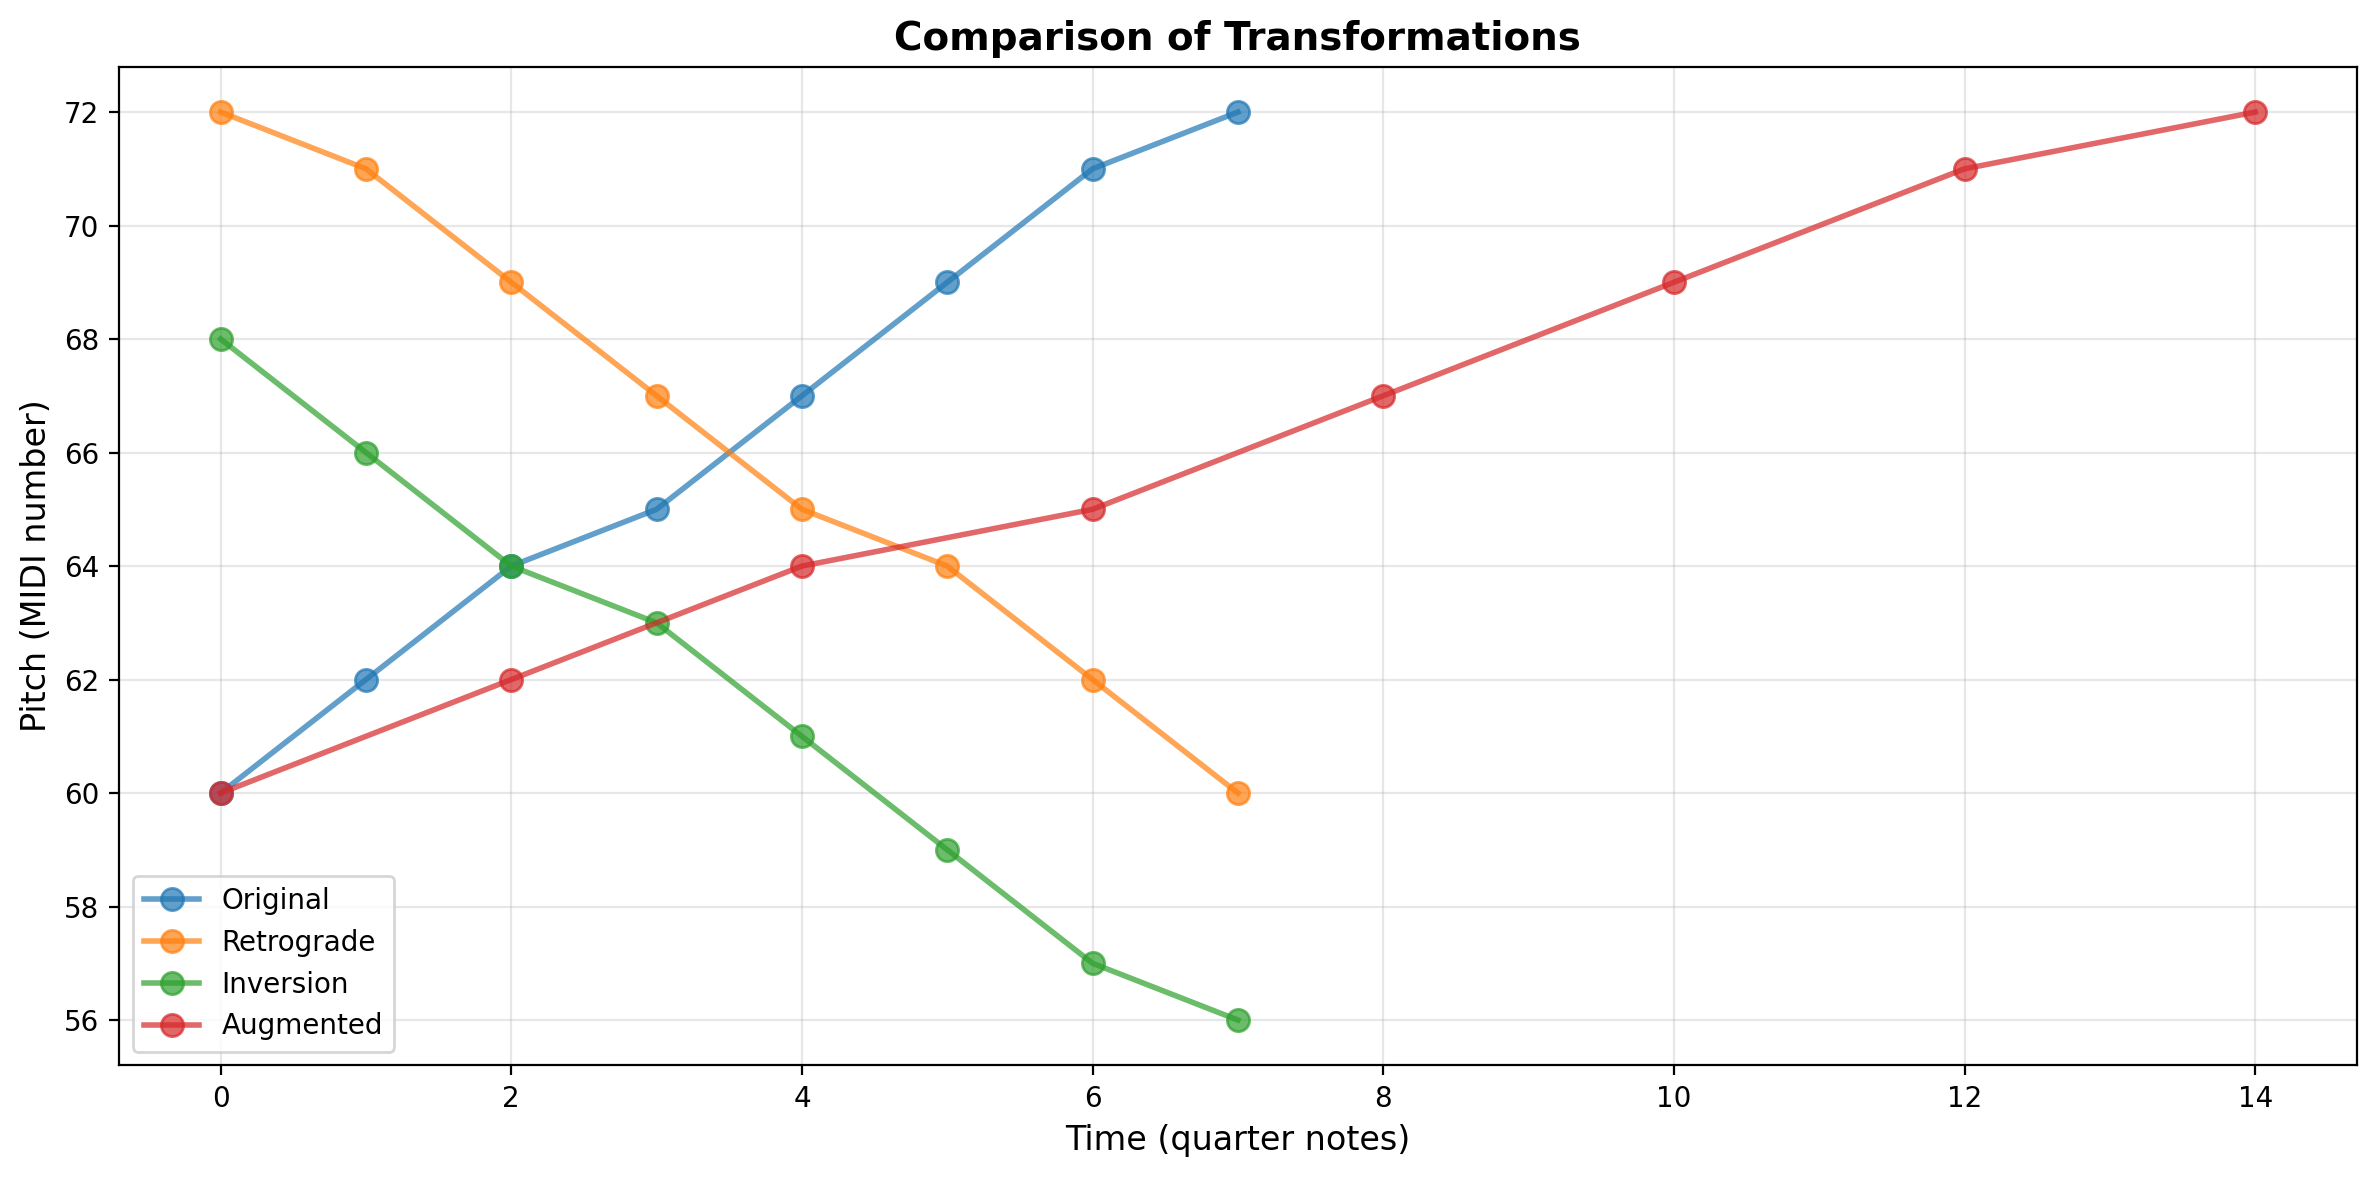

In [8]:
def plot_pitches(parts_dict, title="Pitch Patterns"):
    """Plot pitch patterns for comparison."""
    fig, ax = plt.subplots(figsize=(12, 6))
    
    for i, (label, part) in enumerate(parts_dict.items()):
        pitches = [n.pitch.midi for n in part.notes]
        times = [n.offset for n in part.notes]
        ax.plot(times, pitches, 'o-', label=label, linewidth=2, markersize=8, alpha=0.7)
    
    ax.set_xlabel('Time (quarter notes)', fontsize=12)
    ax.set_ylabel('Pitch (MIDI number)', fontsize=12)
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    return fig

# Compare transformations
transformations = {
    'Original': melody,
    'Retrograde': melody_retro,
    'Inversion': melody_inv,
    'Augmented': melody_aug,
}

fig = plot_pitches(transformations, "Comparison of Transformations")
plt.savefig('../examples/transformation_comparison.png', dpi=150, bbox_inches='tight')
print("✓ Saved: transformation_comparison.png")
plt.show()

## 8. Interval Analysis

Analyze melodic intervals in transformations.

In [9]:
# Analyze intervals
orig_analysis = interval_analysis(melody)
retro_analysis = interval_analysis(melody_retro)
inv_analysis = interval_analysis(melody_inv)

print("Interval Analysis:")
print("\nOriginal:")
if orig_analysis['most_common']:
    interval, count = orig_analysis['most_common'][0]
    print(f"  Most common: {interval} semitones ({count} times)")
print(f"  Total intervals: {orig_analysis['total_intervals']}")
print(f"  Average size: {orig_analysis['average']:.2f} semitones")
print(f"  Largest leap: {orig_analysis['largest_leap']} semitones")

print("\nRetrograde:")
if retro_analysis['most_common']:
    interval, count = retro_analysis['most_common'][0]
    print(f"  Most common: {interval} semitones ({count} times)")
print(f"  Total intervals: {retro_analysis['total_intervals']}")
print(f"  Average size: {retro_analysis['average']:.2f} semitones")

print("\nInversion:")
if inv_analysis['most_common']:
    interval, count = inv_analysis['most_common'][0]
    print(f"  Most common: {interval} semitones ({count} times)")
print(f"  Total intervals: {inv_analysis['total_intervals']}")
print(f"  Average size: {inv_analysis['average']:.2f} semitones")
print(f"  Ascending: {inv_analysis['distribution']['ascending']}, Descending: {inv_analysis['distribution']['descending']}")

Interval Analysis:

Original:
  Most common: 2 semitones (5 times)
  Total intervals: 7
  Average size: 1.71 semitones
  Largest leap: 2 semitones

Retrograde:
  Most common: -2 semitones (5 times)
  Total intervals: 7
  Average size: 1.71 semitones

Inversion:
  Most common: -2 semitones (5 times)
  Total intervals: 7
  Average size: 1.71 semitones
  Ascending: 0, Descending: 7


## 9. Complex Canon Example

Create a complex canon with multiple transformations.

In [10]:
# Create a more interesting melody
melody2 = stream.Part()
pattern = ['C4', 'E4', 'G4', 'B4', 'D5', 'B4', 'G4', 'E4', 'C4']
durations = [1.0, 0.5, 0.5, 1.0, 1.5, 0.5, 0.5, 0.5, 2.0]

for p, d in zip(pattern, durations):
    melody2.append(note.Note(p, quarterLength=d))

# Create multi-voice canon
canon_complex = stream.Score()

# Voice 1: Original
voice1 = melody2
voice1.id = 'Voice 1 (Original)'

# Voice 2: Retrograde + Augmented
voice2 = augmentation(retrograde(melody2), factor=1.2)
voice2.id = 'Voice 2 (Retrograde + Aug)'

# Voice 3: Inverted
voice3 = invert(melody2, axis_pitch='E4')
voice3.id = 'Voice 3 (Inverted)'

# Voice 4: Retrograde + Inverted + Diminished
voice4 = diminution(invert(retrograde(melody2), axis_pitch='G4'), factor=1.5)
voice4.id = 'Voice 4 (Retro+Inv+Dim)'

canon_complex.append(voice1)
canon_complex.append(voice2)
canon_complex.append(voice3)
canon_complex.append(voice4)

print(f"Complex canon created!")
print(f"Voices: {len(canon_complex.parts)}")
for part in canon_complex.parts:
    print(f"  - {part.id}: {part.duration.quarterLength}q")

Complex canon created!
Voices: 4
  - Voice 1 (Original): 8.0q
  - Voice 2 (Retrograde + Aug): 48/5q
  - Voice 3 (Inverted): 8.0q
  - Voice 4 (Retro+Inv+Dim): 16/3q


## 10. Visualize Complex Canon

Plot all voices together.

✓ Saved: complex_canon.png


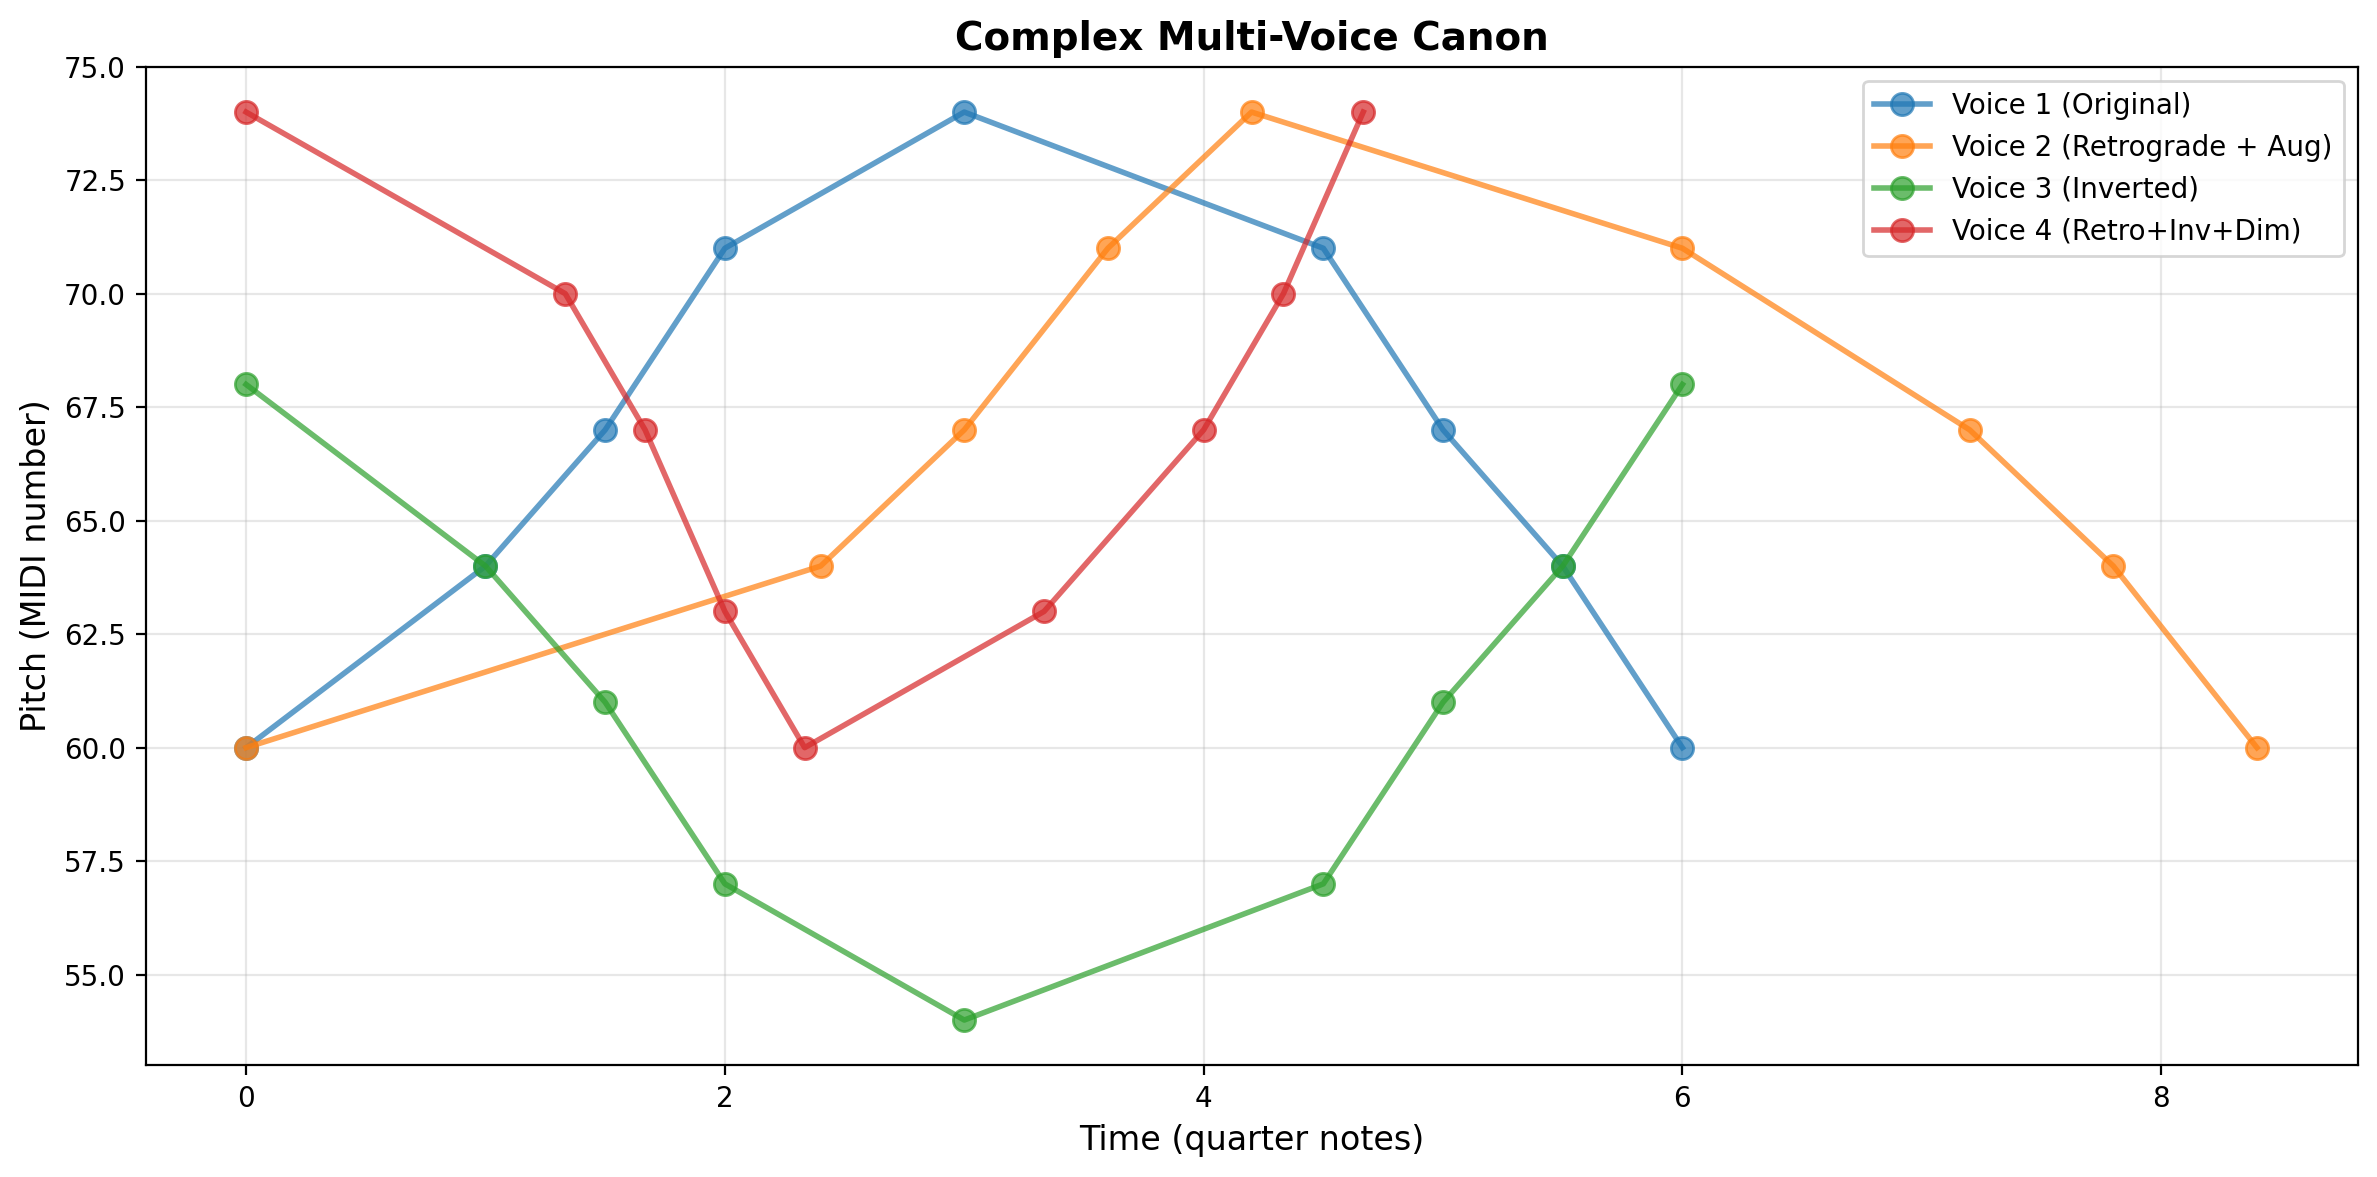

In [11]:
# Plot complex canon
voices_dict = {part.id: part for part in canon_complex.parts}
fig = plot_pitches(voices_dict, "Complex Multi-Voice Canon")
plt.savefig('../examples/complex_canon.png', dpi=150, bbox_inches='tight')
print("✓ Saved: complex_canon.png")
plt.show()

## Summary

This notebook demonstrated:
- ✓ Basic transformations (retrograde, inversion, augmentation, diminution)
- ✓ Chaining multiple transformations
- ✓ Creating mirror canons
- ✓ Interval analysis
- ✓ Complex multi-voice canons
- ✓ Visualization techniques

**Next steps:**
- Try creating your own melodies
- Experiment with different transformation chains
- Analyze real-world canons from Bach and other composers